In [7]:
import time
from typing import Any, Callable, Tuple

import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import solve_continuous_are
from tqdm import tqdm
from IPython.display import HTML

from koopman.simulation.animation import PlotEnvironment
from koopman.simulation.systems import DynamicalSystem, Pendulum
from koopman.simulation.simulator import simulate

Simulation progress: 100%|██████████| 250/250 [00:00<00:00, 25431.74it/s]


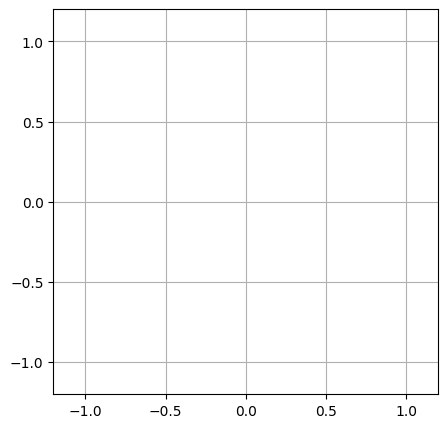

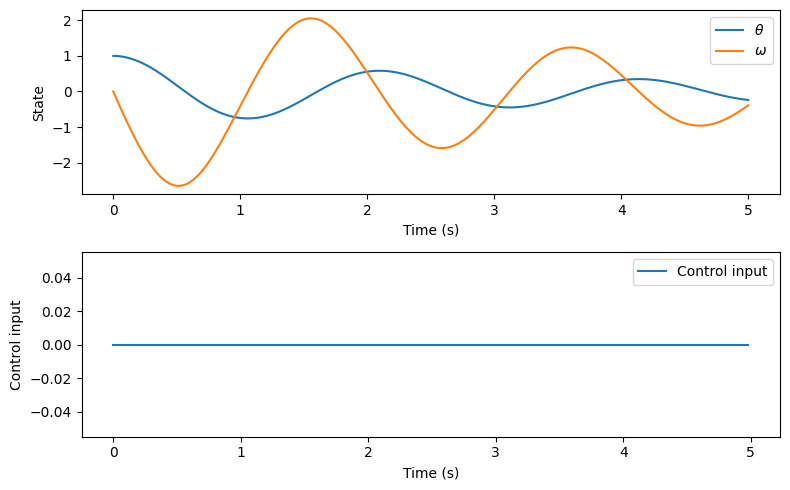

In [ ]:
def simulate_pendulum():
    sys = Pendulum(Pendulum.Params(m=1, l=1, g=9.81, b=0.5))

    x0 = np.array([1.0, 0.0])
    tf = 5.0

    ts, xhist, uhist = simulate(sys, tf=tf, dt=0.02, u=lambda t, x: np.array([0.0]), x0=x0, log=True)

    # Render the simulation
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.grid(True)
    ax.set_aspect('equal')

    env = PlotEnvironment(fig, ax)
    env.add_element(Pendulum.PlotElement(env, sys))
    ani = env.render(t_range=(0, tf), fps=30)
    
    return ani, ts, xhist, uhist

ani, ts, xhist, uhist = simulate_pendulum()

fig, ax = plt.subplots(2, 1, figsize=(8, 5))
ax[0].plot(ts, xhist[:, 0], label=r'$\theta$')
ax[0].plot(ts, xhist[:, 1], label=r'$\omega$')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('State')
ax[0].legend()

ax[1].plot(ts[:-1], uhist, label='Control input')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Control input')
ax[1].legend()
plt.tight_layout()
plt.show()

HTML(ani.to_html5_video())